In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
#from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np
from thisActivity import *
from great_tables import GT, md, style, loc

plt.rcParams.update({'font.size':18})

## Something to review from last time

<center>
<div>
<img src="problem1.png" width=500>
</div>
</center>

$$
\bar{v}_{AC} = \frac{1}{2}\left(\bar{v}_{AB} + \bar{v}_{BC}\right)
$$

- How long does it take to go from A to B?
- How long does it take to go from B to C?

Can we fix this?
$$
\begin{align*}
\bar{v}_{AC} &= \frac{1}{t_{AB}+t_{BC}}\left(t_{AB}\bar{v}_{AB} + t_{BC}\bar{v}_{BC}\right)
\end{align*}
$$

### Aside: Weighted Average from statistics
Find the average of the set $\{1,1,1,2,2,3\}$:

6th grade method:
$$
\bar{x} = \frac{1+1+1+2+2+3}{6} = \frac{10}{6} \approx 1.67
$$

Another way of thinking of it:
$$
\bar{x} = \frac{(\text{# of 1's}) 1 + (\text{# of 2's}) 2 + (\text{# of 3's}) 3}{(\text{# of 1's}) + (\text{# of 2's}) + (\text{# of 3's})}
$$

So, if the number $x_i$ appears in our set $n_i$ times:
$$
\bar{x} = \frac{\sum_i n_i x_i}{\sum_i n_i} = \sum_i p(x_i) x_i
$$
where $p(x_i) = \frac{n_i}{N}$ and $N=\sum_i n_i$ is the count of elements in our set.

## Zooming in on a position vs. time graph
$$
x(t) = t^2 - 6t +10
$$
1. Plot between $t=0$ s and $t=6$ s.

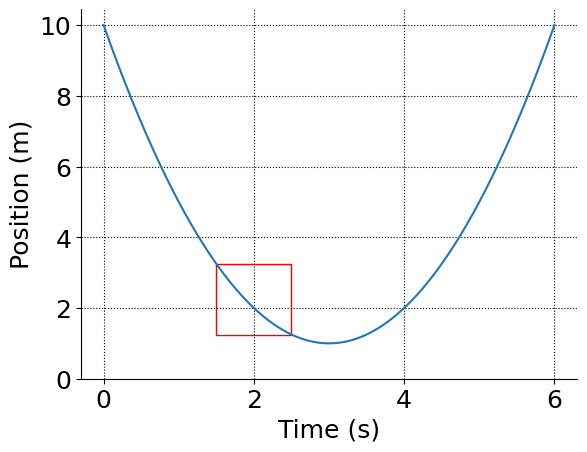

In [2]:
fig, ax = xvtPlt(0,6)
p = plt.Rectangle((1.5,pos(1.5)),width=1,height=(pos(2.5)-pos(1.5)),
             ec='r',fill=False)
ax.add_patch(p)
plt.show()

2. Plot between $t=1.5$ s and $t=2.5$ s.
$$
x(t) = t^2 - 6t +10
$$

Carter Dickson figured out how to zoom on Desmos.

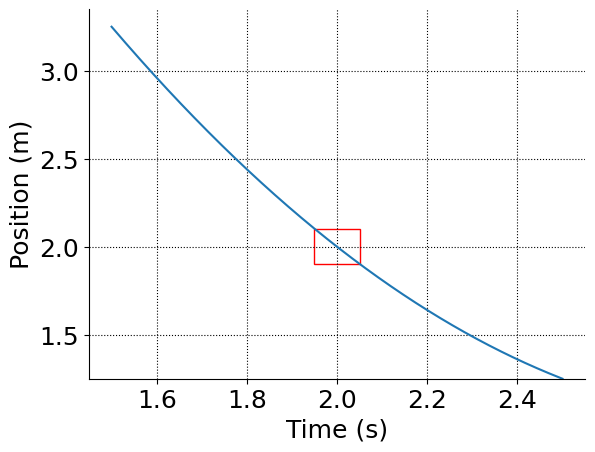

In [3]:
fig, ax = xvtPlt(1.5,2.5)
p = plt.Rectangle((1.95,pos(1.95)),width=.1,height=(pos(2.05)-pos(1.95)),
             ec='r',fill=False)
ax.add_patch(p)
plt.show()

3. Plot between $t=1.95$ s and $t=2.05$ s.
$$
x(t) = t^2 - 6t +10
$$

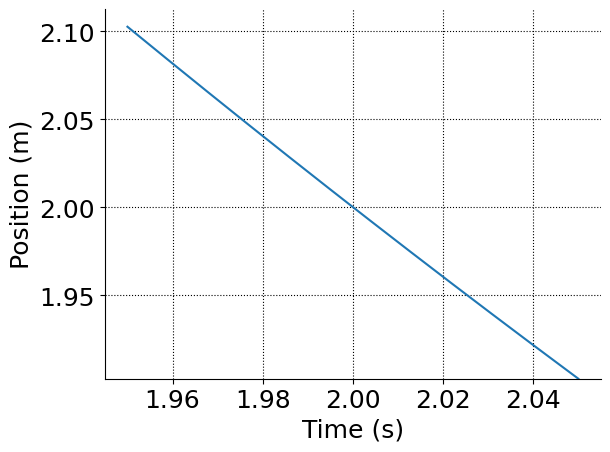

In [4]:
xvtPlt(1.95,2.05)
plt.show()

4. All three graphs are representations of the same motion
    1. How can you account for the last graph being so much straighter than the first?
    2. Can you tell from a very small time interval on a graph whether the motion over the whole graph has constant velocity?
    3. Find your average velocity over the small time interval from part 3 above. Show your work
    4. Add a line with slope equal to this average velocity to your plot from part 1 that goes through the point $(2,2)$. What does this line remind you of from your Calculus I class?  How do you think that the slope of this line compares to the instantaneous velocity at $t=2$ s. Recall the definition of instantaneous velocity:
  
$$
v = \frac{dx}{dt}
$$


The average speed between 1.95 s and 2.05 s is -2.0000000000000133 m/s


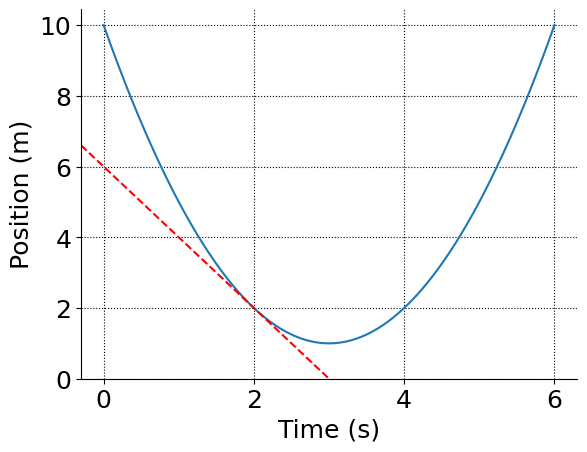

In [5]:
# Behind the scenes, I have created a function called `pos(t)` which calculates t^2-6t+10
avgSpd = (pos(2.05)-pos(1.95))/(2.05-1.95)
print(f"The average speed between 1.95 s and 2.05 s is {avgSpd} m/s")

# This line creates the plot
fig, ax = xvtPlt(0,6)
ax.axline((2, 2), slope=avgSpd, color='r',ls='--')  # adds a red, dashed line going through 
                                                    # (2,2) with slope = avgSpd
plt.show()

## Predicting future position
Suppose that you know three things about an object:
1. Time right now $(t_i)$
2. Current location $(x_i)$
2. Current velocity $(v_i)$

Given what we know about velocity:
$$
v = \frac{dx}{dt} \quad\text{and}\quad \bar{v} = \frac{\Delta x}{\Delta t}
$$
As well as the fact that when $\Delta t$ is small enough,
$$
v \approx \bar{v}
$$
Write an algebraic expression predicting the future position $(x_f)$ some time $\delta t$ after the initial time.
$$
x_f = v_i \delta t + x_i
$$

## Defining acceleration
Acceleration is defined as the time derivative of velocity:
$$
a = \frac{dv}{dt}
$$
Given what we know about the position, and average velocity, write an algebraic expression for the average acceleration
$$
\bar{a} = 
$$


### Discuss in Groups
Suppose that you know two things about an object:
1. Current velocity $(v_i)$
2. Current acceleration $(a_i)$

Is it reasonable to predict that the velocity a short time $\delta t$ later can be written as the following? Why or why not? 
$$
v_f = v_i + a_i \delta t
$$

FYI - This method for integrating differential equations is called *Euler's Method*. 

https://www.youtube.com/embed/v-pbGAts_Fg

(Pause at 1:11)

## Motion of an accelerating object
Suppose you have an object moving in 1D with an acceleration given by the following function of time:
$$
a(t) = \left(1\frac{\text{m}}{\text{s}^2}\right) e^{-t}
$$
You also know that at $t=0$ the position is $x_i=0$ m and the velocity is $v_i=0 \frac{\text{m}}{\text{s}}$. We want to know where, and how fast, the object is moving at $t=5$ s.

1. Carry out the following procedure to make this prediction. You can start by working with paper and pencil, but you will want to transition this calculation to code.
    1. Numerically predict the velocity and position at $t=1$ s.
    2. Given your previous prediction, now predict the velocity and position at $t=2$ s.
    3. Given your previous prediction, now predict the velocity and position at $t=3$ s.
    4. Given your previous prediction, now predict the velocity and position at $t=4$ s.
    5. Given your previous prediction, now predict the velocity and position at $t=5$ s.
2. Do you think that this is accurate? Why or why not?

![](motionTable1.png)

In [6]:
calcMot = calcMotion(0,0,0,5,1)
(
    GT(calcMot)
    .tab_header(title="Motion for δt = 1 s")
    .fmt_number(columns=['pos','vel','acc'], decimals = 4)
    .fmt_number(columns='time', decimals = 1)
    .tab_style(
        style = style.fill(color='pink'),
        locations = loc.body(columns=['pos','vel'], rows=[calcMot.shape[0]-1])
    )
    .cols_label(
        time = "Time (s)",
        pos = "Position (m)",
        vel = "Velocity (m/s)",
        acc = "Acceleration (m/s^2)")
    .tab_source_note(
        source_note = md(cap)
    )
)

GT(_tbl_data=   time       pos       vel       acc
0   0.0  0.000000  0.000000  1.000000
1   1.0  0.000000  1.000000  0.367879
2   2.0  1.000000  1.367879  0.135335
3   3.0  2.367879  1.503215  0.049787
4   4.0  3.871094  1.553002  0.018316
5   5.0  5.424096  1.571317  0.006738, _body=<great_tables._gt_data.Body object at 0x74e4cc6a4910>, _boxhead=Boxhead([ColInfo(var='time', type=<ColInfoTypeEnum.default: 1>, column_label='Time (s)', column_align='right', column_width=None), ColInfo(var='pos', type=<ColInfoTypeEnum.default: 1>, column_label='Position (m)', column_align='right', column_width=None), ColInfo(var='vel', type=<ColInfoTypeEnum.default: 1>, column_label='Velocity (m/s)', column_align='right', column_width=None), ColInfo(var='acc', type=<ColInfoTypeEnum.default: 1>, column_label='Acceleration (m/s^2)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x74e4cc6515b0>, _spanners=Spanners([]), _heading=Heading(title='Motion for δt = 1 s', subtitle=None, preheader=None), _stubhead=None, _source_notes=[Md(text='At t = 5 s the actual position is 4.0067 m and the actual velocity is 0.9933 m/s. <br> ***How can we account for the discrepancy?***')], _footnotes=[], _styles=[StyleInfo(locname='data', locnum=5, grpname=None, colname='pos', rownum=5, colnum=None, styles=[CellStyleFill(color='pink')]), StyleInfo(locname='data', locnum=5, grpname=None, colname='vel', rownum=5, colnum=None, styles=[CellStyleFill(color='pink')])], _locale=<great_tables._gt_data.Locale object at 0x74e4cc0d2f10>, _formats=[<great_tables._gt_data.FormatInfo object at 0x74e4cc0e65e0>, <great_tables._gt_data.FormatInfo object at 0x74e4cc0e62e0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True,

## Motion of an accelerating object
Suppose you have an object moving in 1D with an acceleration given by the following function of time:
$$
a(t) = \left(1\frac{\text{m}}{\text{s}^2}\right) e^{-t}
$$
You also know that at $t=0$ the position is $x_i=0$ m and the velocity is $v_i=0 \frac{\text{m}}{\text{s}}$. We want to know where, and how fast, the object is moving at $t=5$ s.

3. How can we make this more accurate?

Here is our calculation compared to the "correct answer" (I have hidden the details of the calculation)

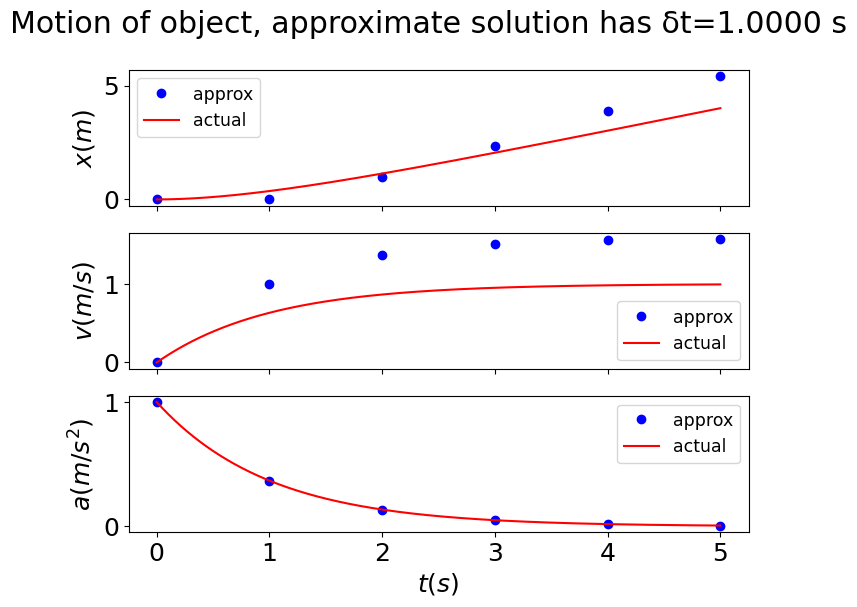

In [7]:
makeTriPlot(0,0,0,5,1)

4. Finally make the following plots from $t=0$ s to $t=5$ s.
    - $x(t)$ vs. $t$
    - $v(t)$ vs. $t$
    - $a(t)$ vs. $t$
  
I've made the following version for you to refer to. I have used $\delta t = 0.001$ s. You should use a time step no larger than $\delta t = 0.02$ s.

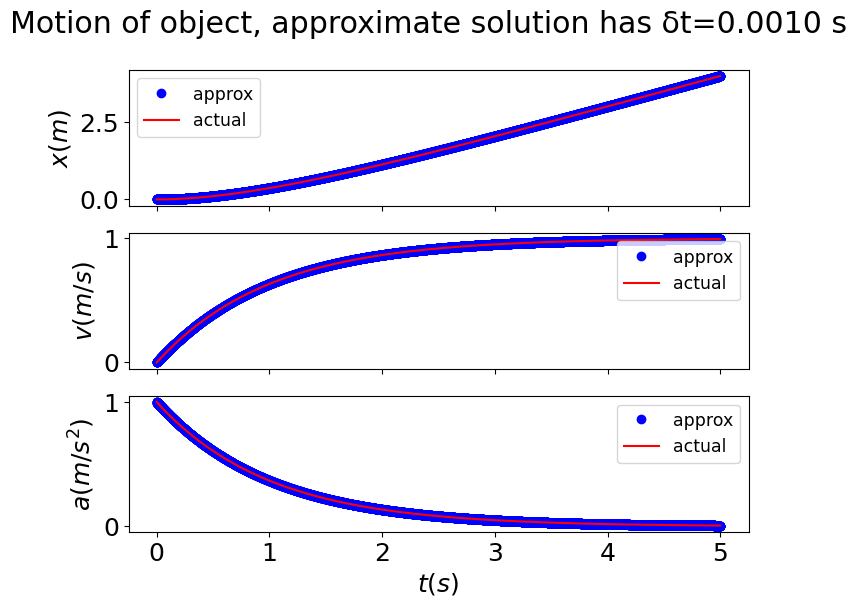

In [8]:
makeTriPlot(0,0,0,5,0.001)

## Appendix: The analytic method for solving this problem:
$$
a(t) = \frac{dv}{dt} = e^{-t} \quad v(0)=0 \quad x(0)=0
$$
### Step 1: Integrate the acceleration to get the velocity
$$
\begin{align*}
v(t) &= \int a(t) dt \\
    &= \int e^{-t} dt \\
    &= -e^{-t} + C_1
\end{align*}
$$
where $C_1$ is an arbitrary constant that is determined by the...

### Step 2: Apply the condition $v(t=0)=0$
$$
0 = -e^0 + C_1 \implies C_1=1
$$
Therefore
$$
v(t) = 1-e^{-t}
$$

### Step 3: Integrate the velocity to find the position
$$
\begin{align*}
    x(t) &= \int v(t) dt \\
        &= \int \left(1-e^{-t}\right) dt \\
        &= t + e^{-t} + C_2
\end{align*}
$$
where $C_2$ is an arbitrary constant that is determined by the...

### Step 4: Apply the condition $x(t=0)=0$
$$
0 = 0 + e^0 + C_2 \implies C_2 = -1
$$
Therefore
$$
x(t) = t - e^{-t} - 1
$$

These functions for $x(t)$ and $v(t)$ are the red lines that I have added to my graphs as the "actual" answer.

## Differential Equations lingo
I don't want you to focus on learning this for this class, but I am attempting to put what you are learning here in a context that will be useful for future coursework so that when it comes up again, it hopefully looks/feels a little familiar.

The equation
$$
a(t) = e^{-t}
$$
can be framed in one of two ways.

1. A 2nd order differential equation (second order because it has a 2nd derivative in it):
$$
\frac{d^2x}{dt^2} = e^{-t}
$$
2. Two, 1st order differential equations:
$$
\frac{dv}{dt} = e^{-t} \quad \frac{dx}{dt} = v(t)
$$

Either way, the system has a *generalized solution* (that is, one where we don't have any initial values or *boundary conditions*). If we want to have a *specific solution*, we need to know the value of the functions $x(t)$ and $v(t)$ for some time value. (It need not be zero, like we had in this example).